<a href="https://colab.research.google.com/github/Sridharpadhy/Cardiovascular-Risk-Prediction/blob/main/Sridhar_ML_Classification_Capstone_Project_Cardiovascular_Risk_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Project Name**    - 
Cardiovascular Risk Prediction


##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member -** - Sridhar Bhagaban Padhy


# **Project Summary -**


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides, the patients' information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Cardiovascular diseases (CVDs) are the leading cause of death globally.
An estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol.
It is important to detect cardiovascular disease as early as possible so that management with counselling and medicines can begin.
Thats why here from the medical history dataset the prediction  is to be done for risk of any coronory heart disease and if it is there it can prevented early as possible .

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pylab
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
import math
from sklearn.ensemble import RandomForestRegressor
!pip install scikit-optimize
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV
from sklearn import ensemble


from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 3.6 MB/s eta 0:00:00


### Dataset Loading

In [ ]:
#Mount drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
#Loading Dataset
cardio_df = pd.read_csv('/content/drive/MyDrive/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')

### Dataset First View

In [ ]:
# Dataset First Look
cardio_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
cardio_df.shape

(3390, 17)

### Dataset Information

In [ ]:
# Dataset Info
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

From here we can say that the many columns has null values like education , cigsperday , Bpmeds , totchol , BMI , heartRate , glucose . and many features are having dtype of "float" .

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

In [ ]:
cardio_df.duplicated().sum()

0

so , as here we get the false so our dataset has no duplicate values.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
cardio_df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

From here we can say that the many columns has null values like education , cigsperday , Bpmeds , totchol , BMI , heartRate , glucose . 

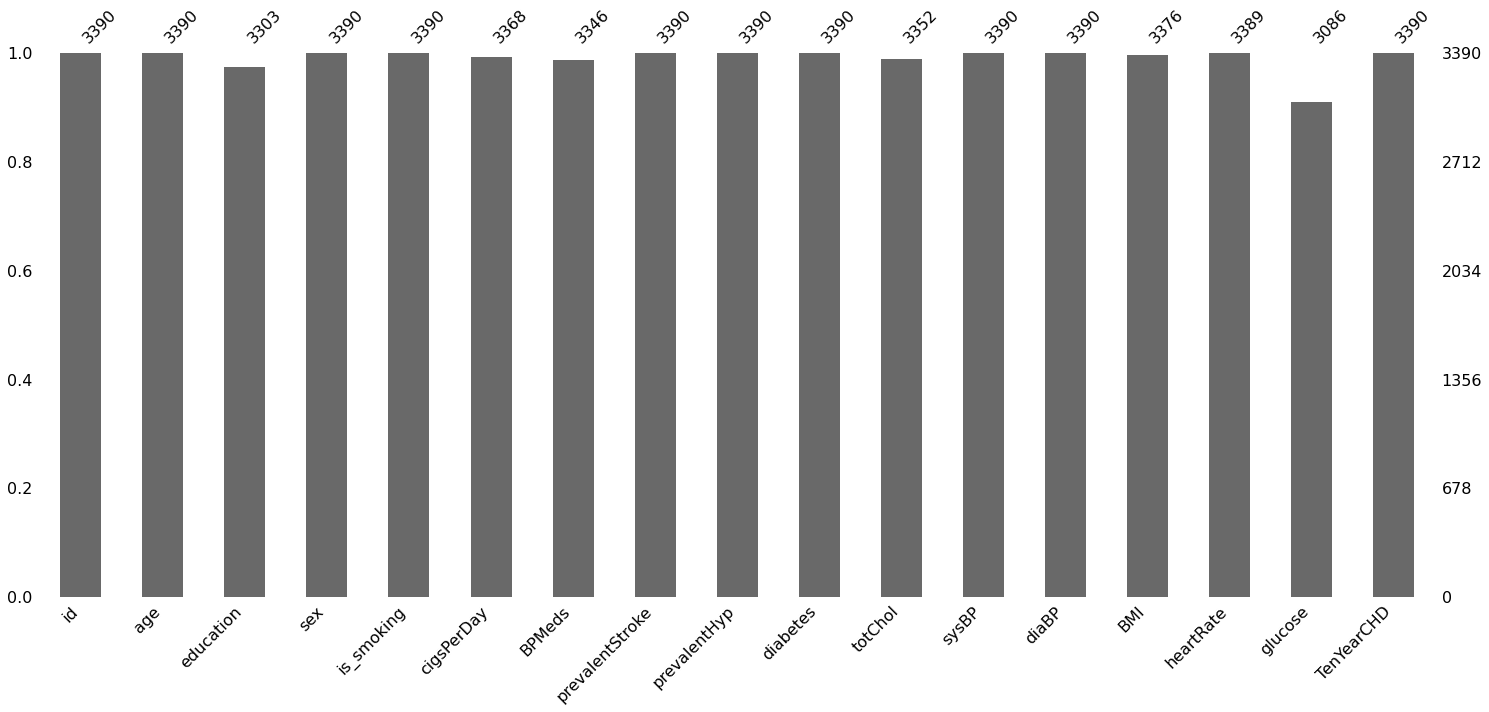

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(cardio_df)

In [ ]:
cardio_df.isnull()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3386,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3388,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


### What did you know about your dataset?

So , till now by getting info about the dataset we got so idea about the features the number of null value its info and it doesnot has any duplicate values and many features are catogerical many has the dtype of float also.
Data set is in csv format, it has 3390 rows and 17 columns.

7 columns have null values namely:

education column has 87 null values, cigs_per_day has 22, BP_Meds has 44, totchol has 38, BMI has 14, and glucose ha 304. since our data set is very small we cannnot remove or drop null values,and also all the rows and their information is important for future prediction and all values has important roles so ,  we can only replace them. 

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
cardio_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
cardio_df.describe().round(2)

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.00,3390.00,3303.00,3368.00,3346.00,3390.00,3390.00,3390.00,3352.00,3390.00,3390.00,3376.00,3389.00,3086.00,3390.00
mean,1694.50,49.54,1.97,9.07,0.03,0.01,0.32,0.03,237.07,132.60,82.88,25.79,75.98,82.09,0.15
std,978.75,8.59,1.02,11.88,0.17,0.08,0.46,0.16,45.25,22.29,12.02,4.12,11.97,24.24,0.36
min,0.00,32.00,1.00,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.96,45.00,40.00,0.00
25%,847.25,42.00,1.00,0.00,0.00,0.00,0.00,0.00,206.00,117.00,74.50,23.02,68.00,71.00,0.00
50%,1694.50,49.00,2.00,0.00,0.00,0.00,0.00,0.00,234.00,128.50,82.00,25.38,75.00,78.00,0.00
75%,2541.75,56.00,3.00,20.00,0.00,0.00,1.00,0.00,264.00,144.00,90.00,28.04,83.00,87.00,0.00
max,3389.00,70.00,4.00,70.00,1.00,1.00,1.00,1.00,696.00,295.00,142.50,56.80,143.00,394.00,1.00


### Variables Description 

The following columns are:

Id : It contains unique Id of patients from 0 to 3390.

Age : It contains the age of patients for which we have to predict CHD.

Education : It has Education of the patients 1,2,3,4.

Sex : It contains the gender of the patients whether the patient is Male or Female.

is_smoking : This columns contains whether the patient is smoking or not. So values in it is in either YES or NO.

cigsPerDay : It contains the quantity of cigarette the patient consumes per day.

BPmeds : It contains whether the patient is taking BP Medicine or not. Here, 1 
means patient is taking BP medicines and 0 means patient is not taking medicines.

pevalentStroke : It contains whether the patient has history of stroke or not. Here, if it is yes then it should be 1 or if no then it should be 0.

prevalentHyp : It contains whether the patient has history of hypertension or not. Here, 1 denotes he has hypertension before and 0 denotes the patient doesnot have hypertension.

Diabetes : It contains whether the patient has diabetes or not. Here, 1 means patient has diabetes and 0 means patient doesnot have diabetes.

totChol : It contains the measure of the cholestrol of the patients.

sysBP : It contains systollic Blood Pressure measure of the patients.

diaBP : It contains diastolic Blood Pressure measure of the patients.

BMI : It contains Body Mass Index of the patients.

heartRate : It contains the heart rate of the patients.

glucose : It contains the glucose level of the patients.

TenYearCHD : It contains whether the patients whether a patient has a 10 year risk of future coronary heart disease(CHD).

### Check Unique Values for each variable.

In [ ]:

for col in cardio_df.columns :
  values = cardio_df[col].unique()
  print(f' # - SO the unique values of {col} is {values} ' )

 # - SO the unique values of id is [   0    1    2 ... 3387 3388 3389] 
 # - SO the unique values of age is [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32] 
 # - SO the unique values of education is [ 2.  4.  1.  3. nan] 
 # - SO the unique values of sex is ['F' 'M'] 
 # - SO the unique values of is_smoking is ['YES' 'NO'] 
 # - SO the unique values of cigsPerDay is [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.] 
 # - SO the unique values of BPMeds is [ 0. nan  1.] 
 # - SO the unique values of prevalentStroke is [0 1] 
 # - SO the unique values of prevalentHyp is [0 1] 
 # - SO the unique values of diabetes is [0 1] 
 # - SO the unique values of totChol is [221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 1

## 3. ***Data Wrangling***

### Data Wrangling Code

In [5]:
# Write your code to make your dataset analysis ready.
#Data Cleaning

### 1. Handling Missing Values 

Education and BPMeds are categorical variables. So, we will be filling the null values with mode of the data of the respective columns.While ,  cigsPerDay, totChol, BMI, heartRate and glucose are continuous variables. We will be filling the null values with the median of the data of the respective columnns.

In [ ]:
cardio_df[cardio_df['cigsPerDay'].isnull()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,422,55,1.0,F,YES,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,466,45,3.0,M,YES,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,469,42,1.0,M,YES,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,491,61,1.0,F,YES,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,538,41,1.0,F,YES,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,767,54,1.0,M,YES,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,1461,47,2.0,F,YES,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,1467,49,1.0,F,YES,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,1597,57,NaN,F,YES,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,1986,49,2.0,F,YES,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


In [ ]:
#But for column cigperday median is 0 .
cardio_df['cigsPerDay'].median()

0.0

so , The median for cigsPerDay is coming as zero and if we are filling the null values of cigsPerDay as zero it will not be correct as in is_smoking it is mentioned as Yes. So, we will be filling the null values of cigsPerDay with mean of the data.

In [6]:
cardio_df['cigsPerDay'] = cardio_df['cigsPerDay'].fillna(round(cardio_df['cigsPerDay'].mean(), 1))

In [7]:
#def a function for all the mode columns 
def fillna_mode (column):
 for col in column:
   cardio_df[col]=cardio_df[col].fillna(round(cardio_df[col].mode()[0],1))
  

In [8]:
#def a function for all the median columns
def fillna_median (column):
  for col in column:
   cardio_df[col]=cardio_df[col].fillna(cardio_df[col].median())

In [9]:
fillna_mode(['education','BPMeds'])
fillna_median(['totChol','BMI','heartRate','glucose'])


In [10]:
cardio_df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

so , we can say that all the null values are successfully handeled.

In [11]:
cardio_df.loc[(cardio_df['cigsPerDay']== 0) &  (cardio_df['is_smoking']== 'YES')]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [ ]:
cardio_df['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [ ]:
#so , by this we saw that is there any values present where smoking is yes and the cigperday is 0 but it seems perfect.

In [12]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [13]:
categorical_columns = ['education','cigsPerDay','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
numerical_columns = ['age','totChol','sysBP','diaBP','BMI','heartRate','glucose']

### What all manipulations have you done and insights you found?

 We have just handled the missing null values and seen some columns like cigs per day and issmoking is there any misvalues or not orther than that we have just classified columns into categorical and numerical so that it becomes easy when we are performing EDA.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
#Target value distribution

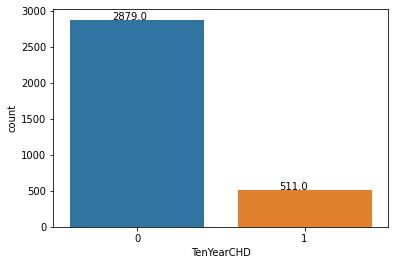

In [34]:
ax= sns.countplot(cardio_df['TenYearCHD'])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

##### 1. Why did you pick the specific chart?

 Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Distribution of dependent variable shows that very less number of people (511) are prone to cardiovascular risk. Graph clearly shows that 2879 people are out of risk zone.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes , it will give positive output for our prediction

#### Chart - 2

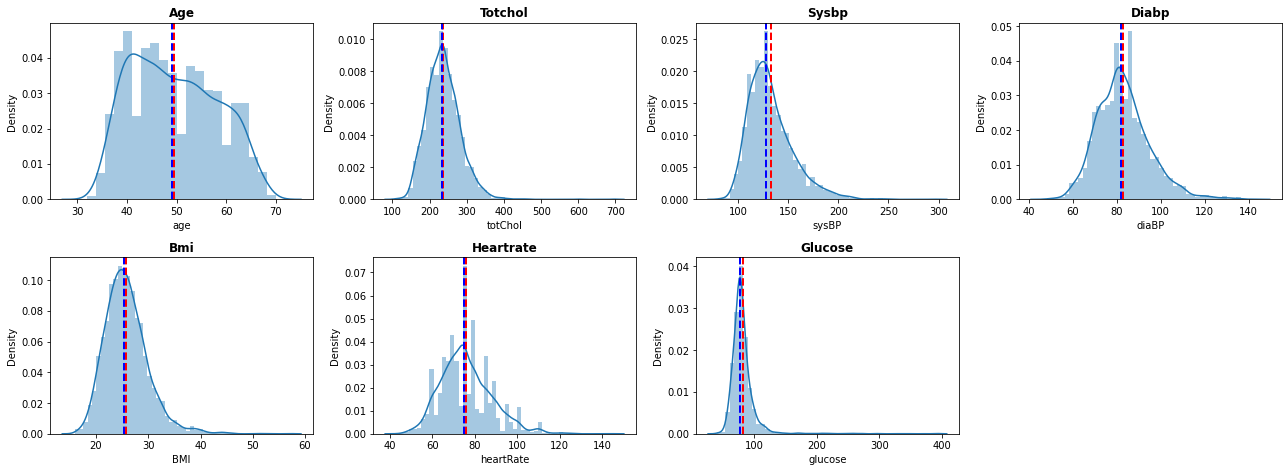

In [35]:
# Chart - 2 visualization code
#'Numerics feature distribution'
plt.figure(figsize=(18,16))
for n,column in enumerate(numerical_columns):
  feature = cardio_df[column]
  ax=plt.subplot(5, 4, n+1)
  sns.distplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.

##### 2. What is/are the insight(s) found from the chart?

FRom the univariate graph many insights we got and some of them are like most of the features are normally distributed or close to normal distribution.

Age distribution displays a mean or avrage of 49.5 and the data ranges from 35 to 70.

TotChol has range from 100 to 700 with an average of around 240.

SysBP has range from 90 to 300 with an average of around 140.

DiaBP has range from 55 to 140 with an average of around 82-83.

BMI represents a normal distribution with most values between 20-40 and few exceeding values, it has an average ofaround 25.

HeartRate distribution displays a mean or average of 75 and the data ranges from 55 to 140.

Glucose distribution is highly skewed with its lowest value being 50 to its highest value 400 average of this distribution is around 80.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is giving all the insights and how it will effect our prediction and gentle idea about it.

#### Chart - 3

In [43]:
#Function to plot the feature distribution with respect to TenYearCHD
def bar_wrt_Target(col):
  '''This function plot the distribution for a given feature with respect to TenYearCHD.
  Pass the feature name in str to plot the graph.'''
  if len(cardio_df.groupby([col,'TenYearCHD'])['id'].count())>60:
     plt.figure(figsize = (50,15))
  else:
     plt.figure(figsize = (15,7))
  plt.title(f'{col} distribution with respect to TenYearCHD')
  sns.barplot(x = col, y = 'id', hue = 'TenYearCHD',data = cardio_df.groupby([col,'TenYearCHD'])['id'].count().reset_index())
  plt.legend(loc = 'upper right', title = 'TenYearCHD')
  plt.xticks(rotation = 90)
  plt.show()
     

Smoking and other tobacco use is also a significant risk factor for CVD. The harmful substances in tobacco can damage and narrow your blood vessels.

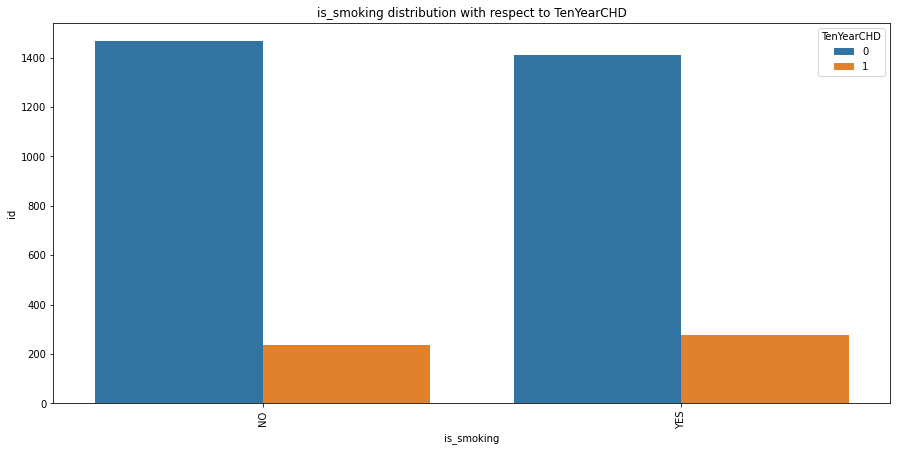

In [44]:
# Chart - 3 visualization code
bar_wrt_Target('is_smoking')

##### 1. Why did you pick the specific chart?

As we know bar chart is useful when you are comparing segments of information, such as to compare different categorical or discrete variables so we have used them to display distribution of smoking column.

##### 2. What is/are the insight(s) found from the chart?

Above plot shows that even if the person is not smoking he/she is at equal risk of cardiovascular diseases when compared to people who are smoking.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

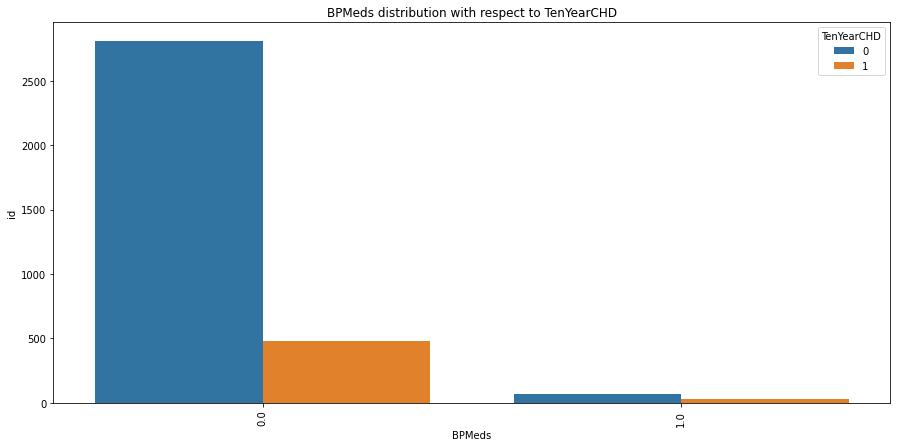

In [45]:
# Chart - 4 visualization code
bar_wrt_Target('BPMeds')

##### 1. Why did you pick the specific chart?

For BPMeds distribution bar charts have been used as Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

 Very less number of people were found to be taking BP medicines and 50% of them were at higher risk to cardiovascular disease. And also those people how doesnot have bp problem or dont take medicine can even has change to CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

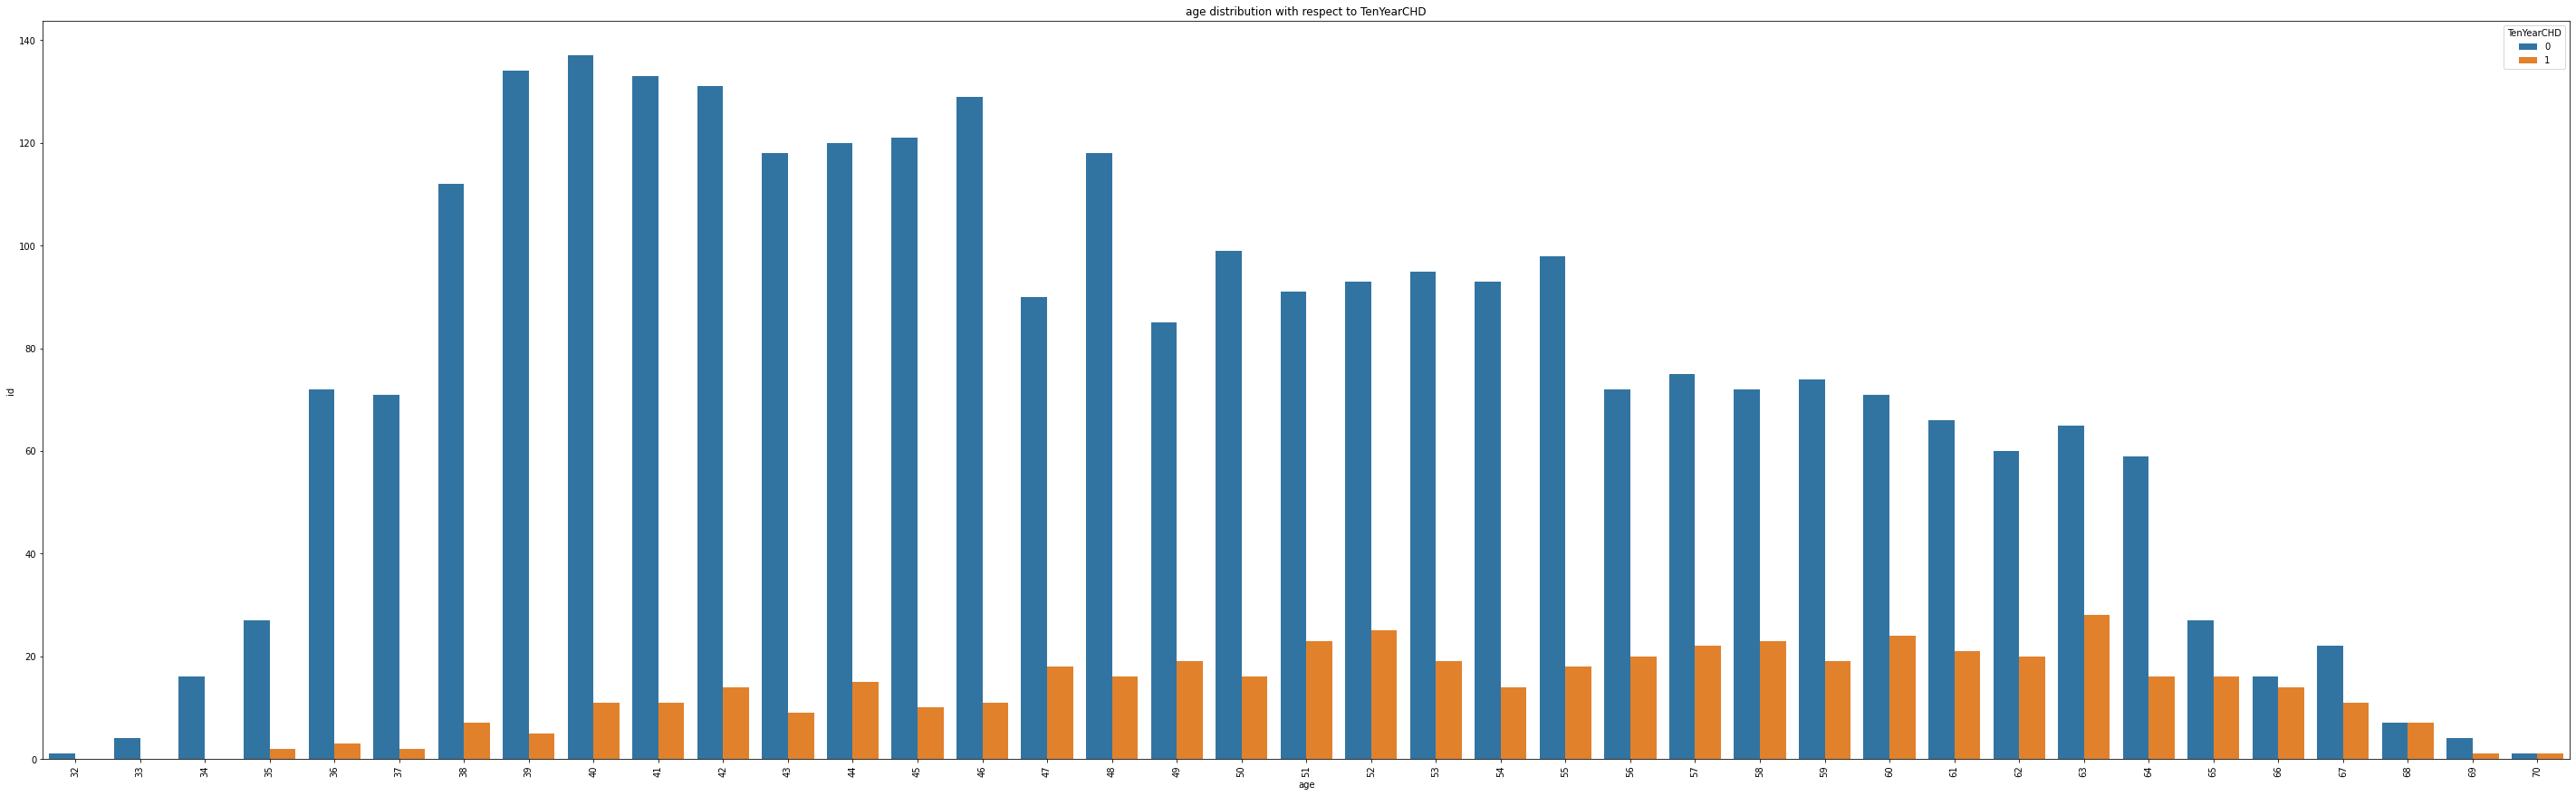

In [46]:
# Chart - 5 visualization code
bar_wrt_Target('age')

##### 1. Why did you pick the specific chart?

Age distribution with respect to CHD risk has been represented using multiple bar charts. Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. Instead of having only one bar at each division on the horizontal axis.

##### 2. What is/are the insight(s) found from the chart?

With increasing age, chances of having cardiovascular disease increases. As the graph shows people from age 50 acquires higher risk of cardiovascular disease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

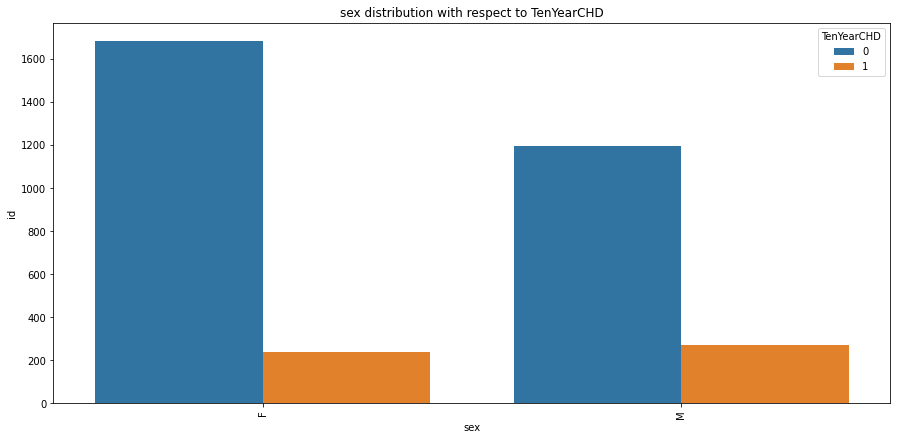

In [47]:
# Chart - 6 visualization code
bar_wrt_Target('sex')

##### 1. Why did you pick the specific chart?

Gender and CHD risk has been represented using bar charts,Bar chart is useful when you are comparing segments of information, such as to compare different categorical or discrete variables.

##### 2. What is/are the insight(s) found from the chart?

As compared to females, males are prone to cardiovascular risks.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

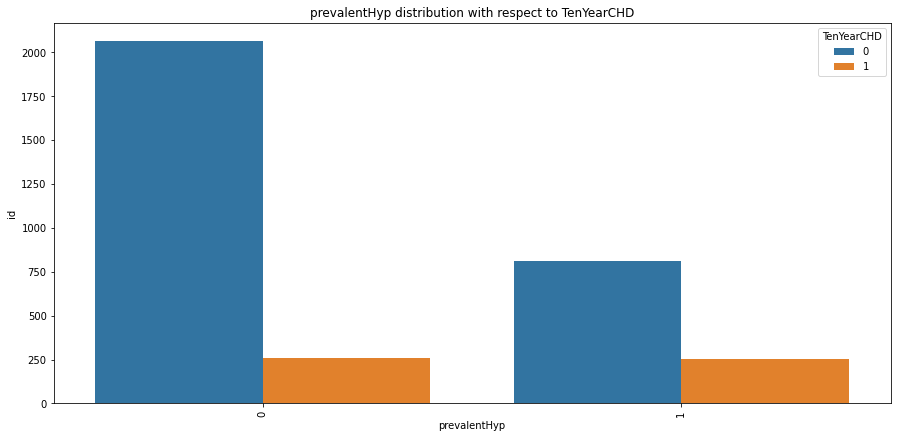

In [48]:
# Chart - 7 visualization code
bar_wrt_Target('prevalentHyp')

##### 1. Why did you pick the specific chart?

Prevalent hypertension has also been represented using bar charts as, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Above graph shows that people already having hypertension are more prone to cardiovascular disease as compared to people not having hypertension.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

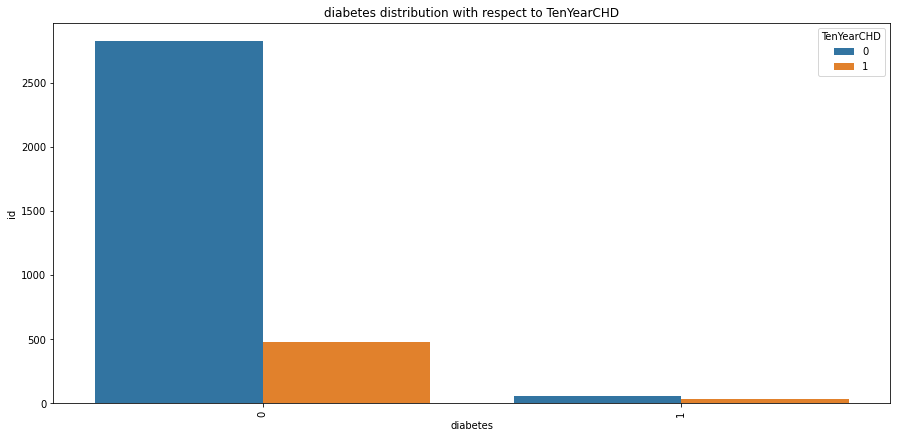

In [49]:
# Chart - 8 visualization code
bar_wrt_Target('diabetes')

##### 1. Why did you pick the specific chart?

For distribution of diabetes with respect to CHD risk bar charts have been used as Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Diabetic people are at very high risk of getting cardiovascular disease. As the graph shows among 87 people 61.1% of population are at higher risk of getting cardiovascular disease.




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

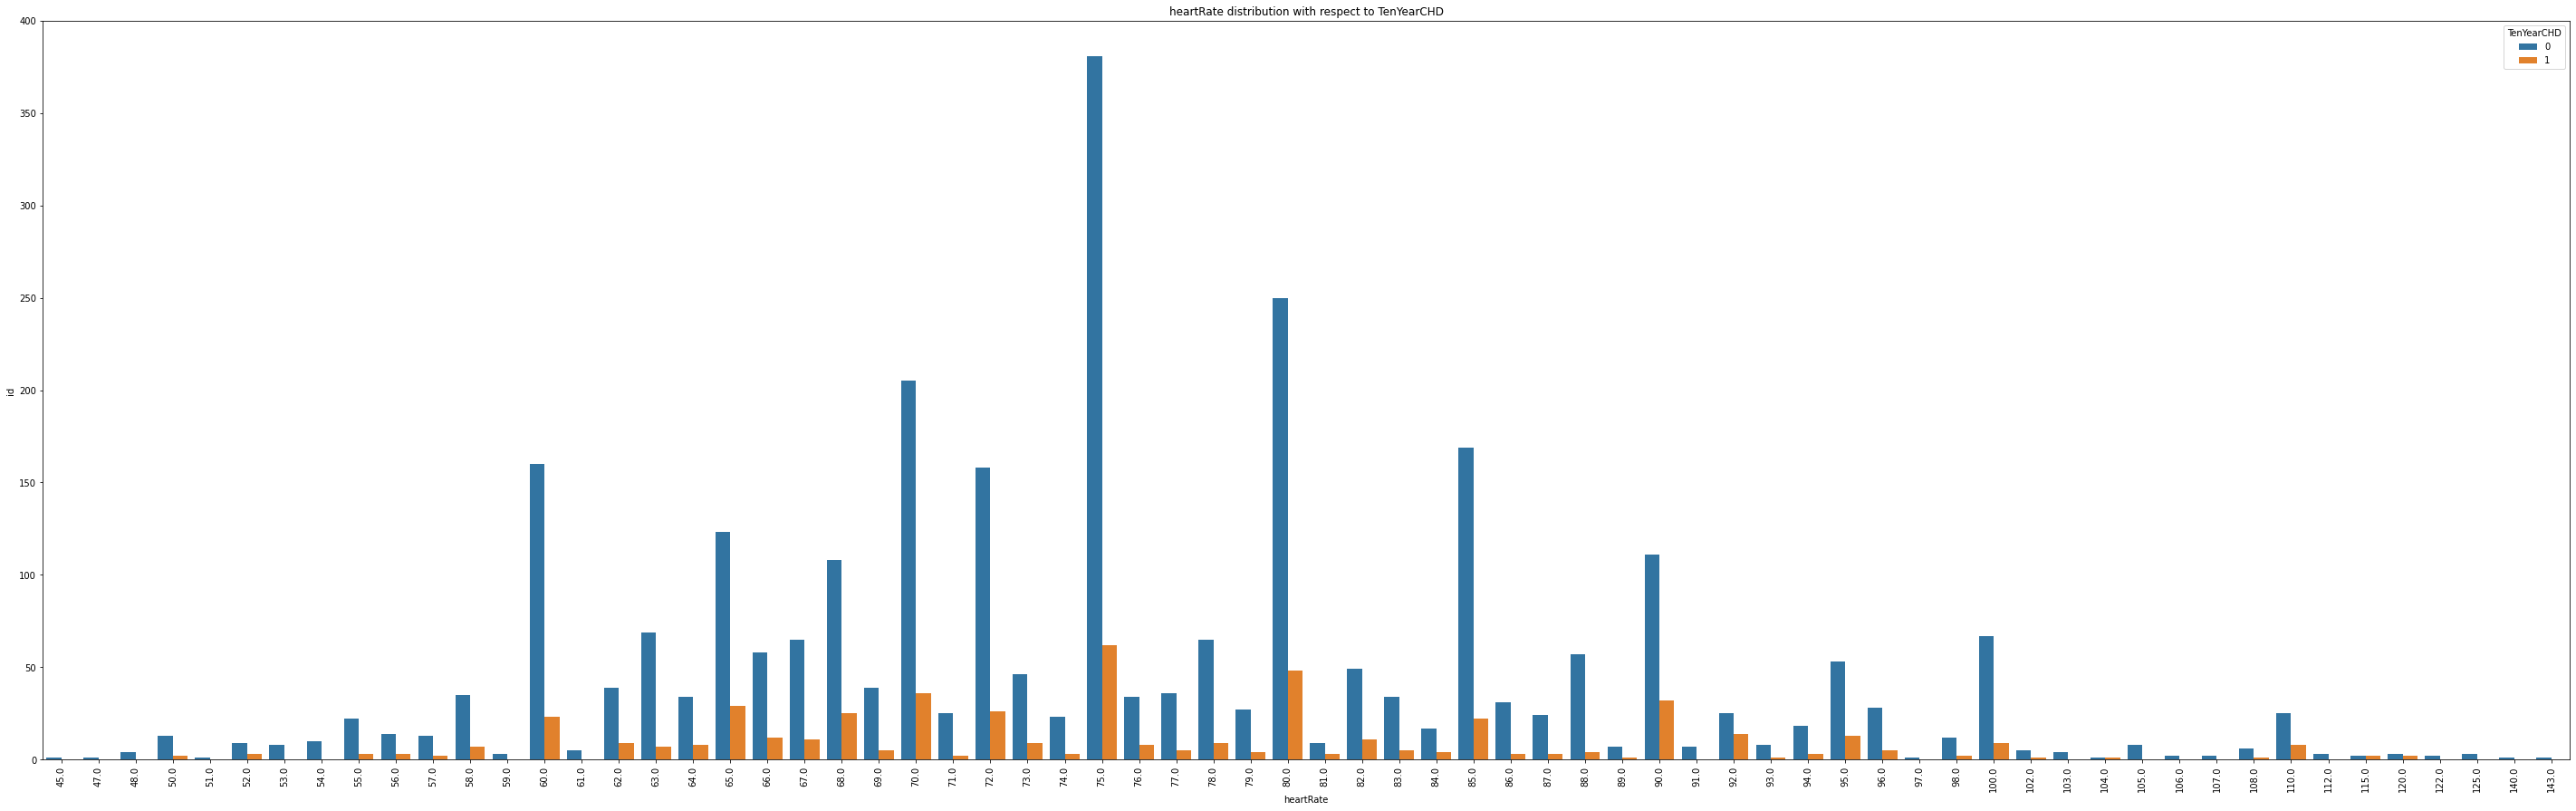

In [50]:
bar_wrt_Target('heartRate')

##### 1. Why did you pick the specific chart?

Herat rate and CHD risk has also been displayed by using multiple bar charts. Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space.

##### 2. What is/are the insight(s) found from the chart?

A large proportion of population was found to have normal heart rate i.e, 75 bpm.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

If your BMI is:

below 18.5 – you're in the underweight range
between 18.5 and 24.9 – you're in the healthy weight range
between 25 and 29.9 – you're in the overweight range
between 30 and 39.9 – you're in the obese range

Text(0.5, 1.0, 'BMI vs Age')

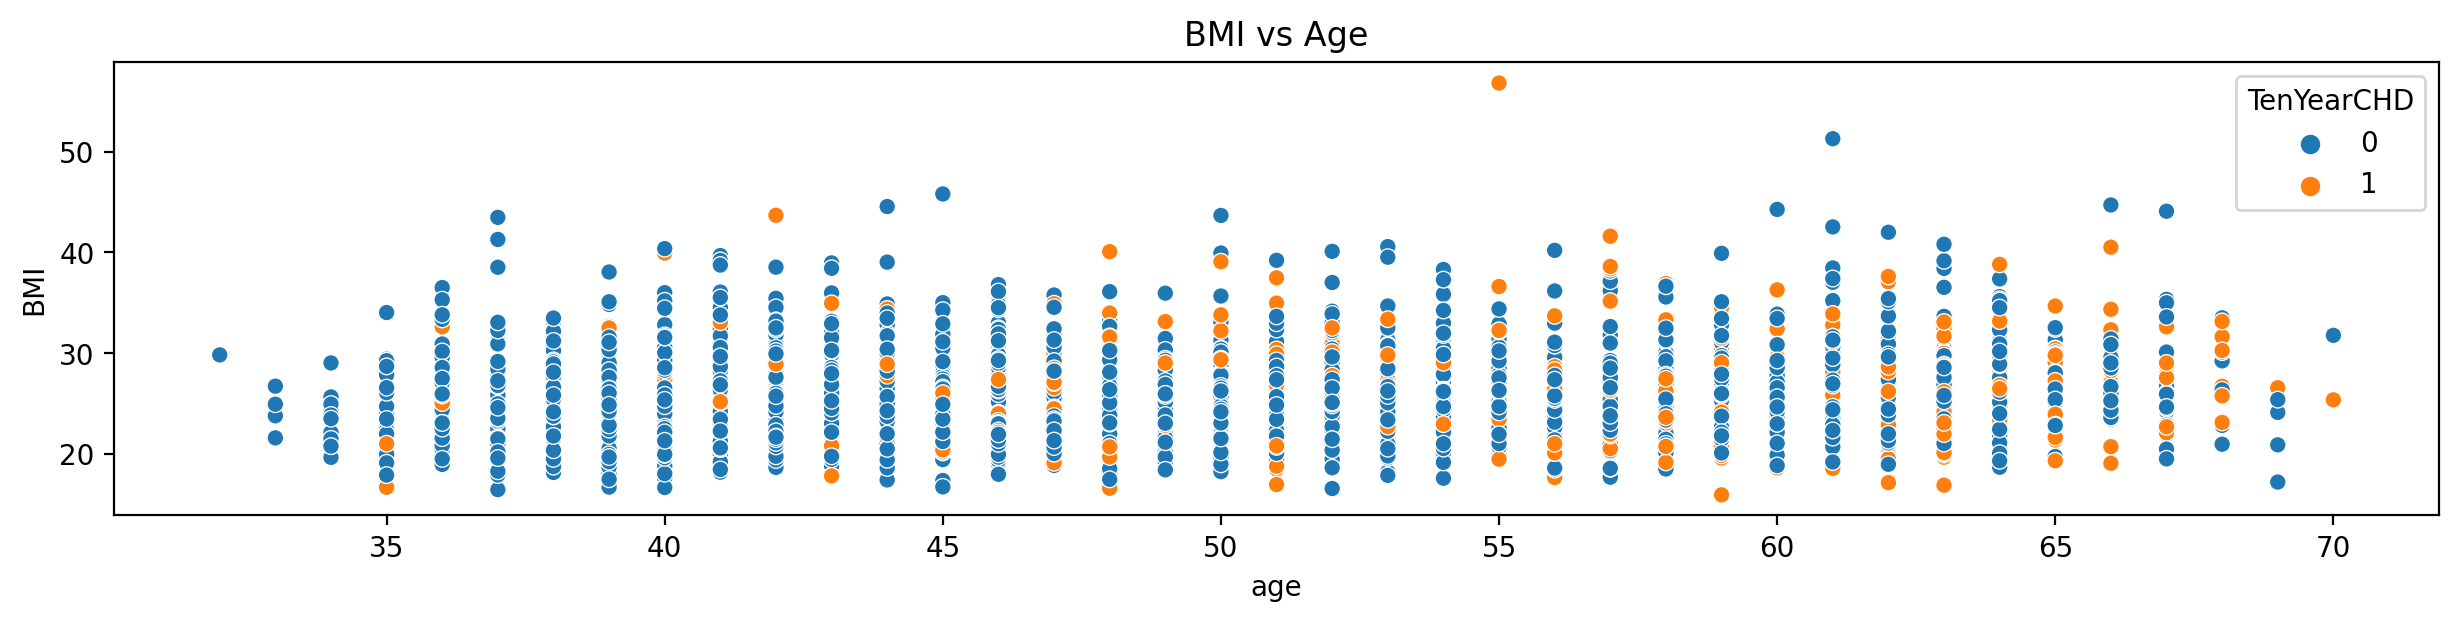

In [57]:
# Chart - 10 visualization code
figure = plt.subplots(figsize=(15,3), dpi=200)
sns.scatterplot(data=cardio_df, x='age', y='BMI', hue='TenYearCHD')
plt.title('BMI vs Age')

##### 1. Why did you pick the specific chart?

Distribution of age and BMI with respect to CHD risk uses ascatter plot for data representation. We have used scatterplot as they are used to determine association of variables i.e, how much one variable is affected by another.

##### 2. What is/are the insight(s) found from the chart?

Above scatterplot suggests that age has no correlation with BMI. Number of points showing people at risk, increases with increase in age.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

Text(0.5, 1.0, 'Systolic BP vs diastolic BP')

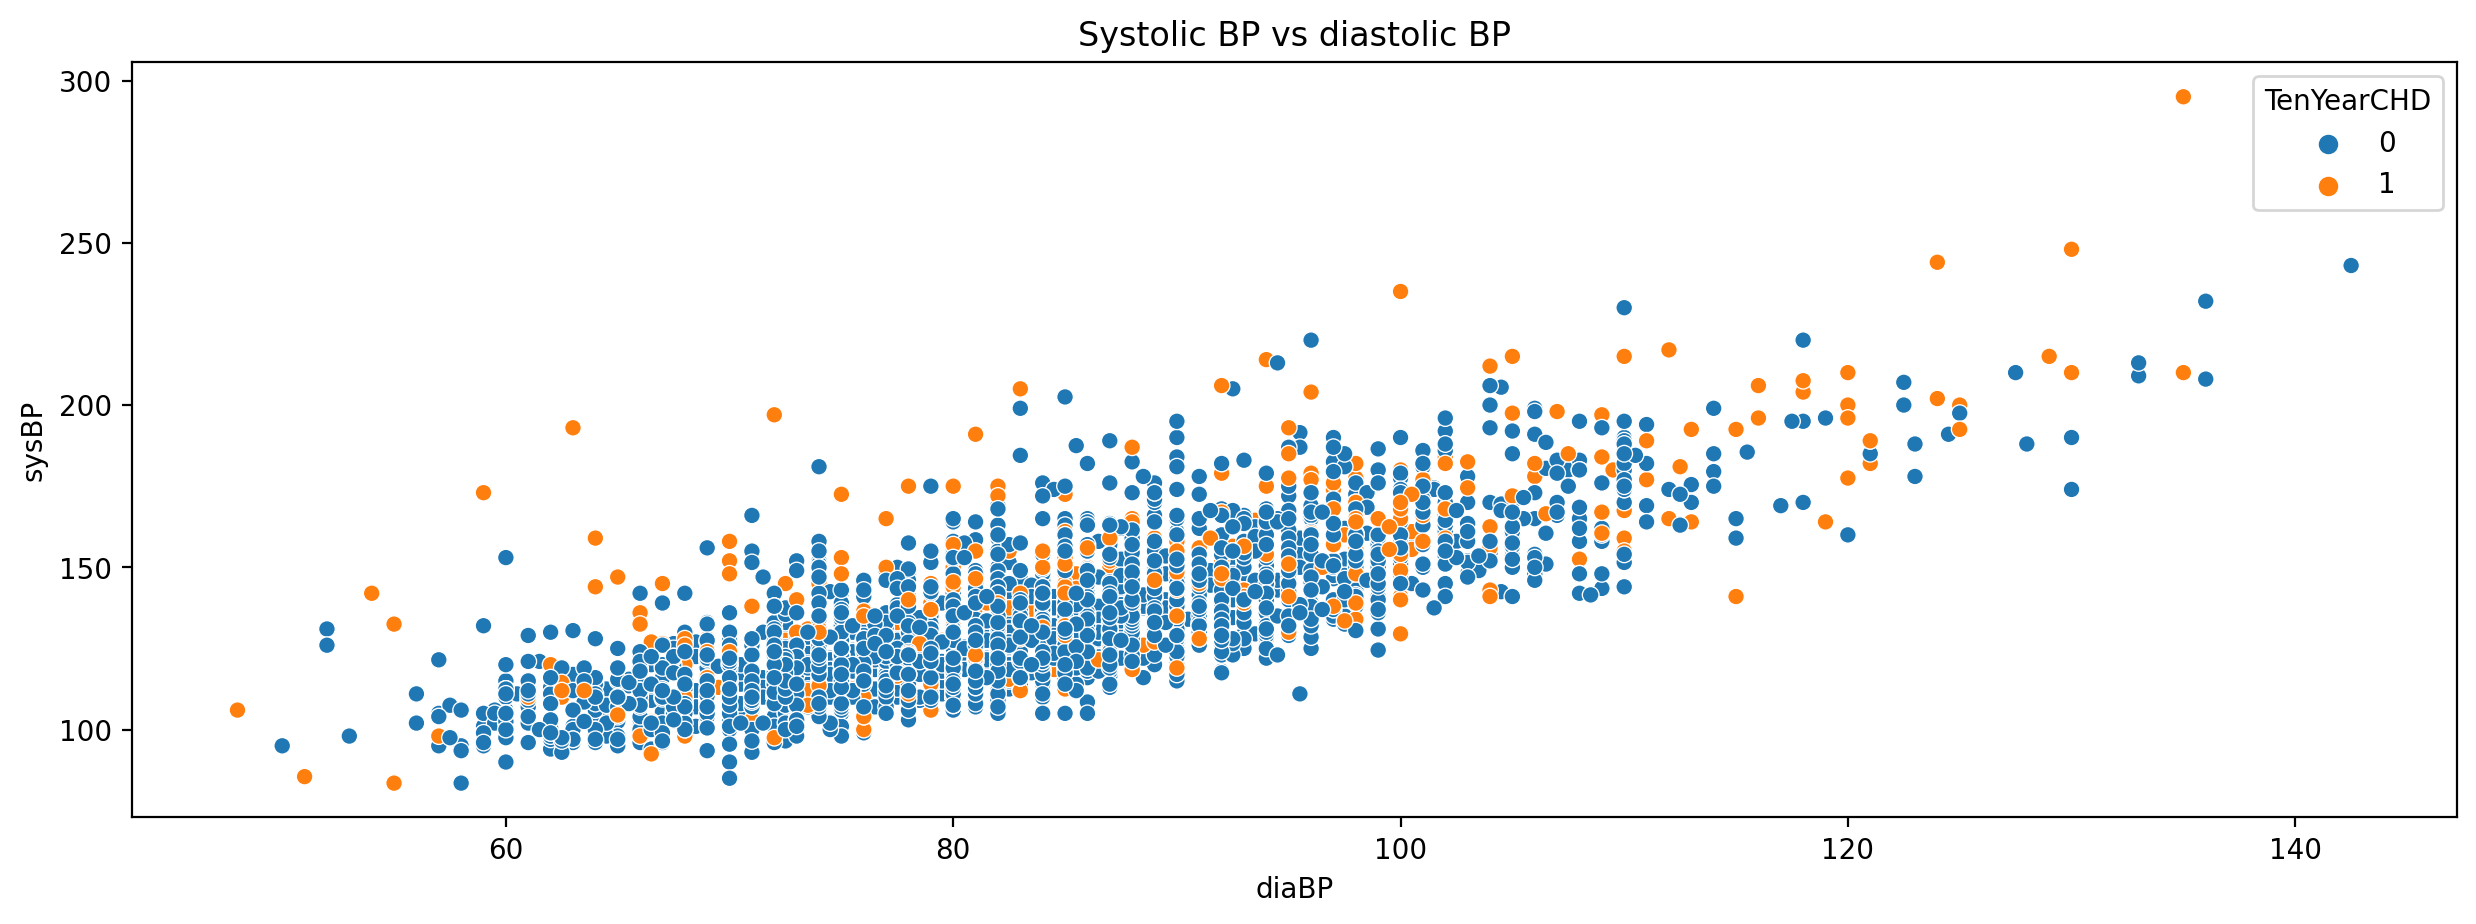

In [58]:
# Chart - 11 visualization code
figure=plt.subplots(figsize=(15,5), dpi=200)
sns.scatterplot(data=cardio_df, y='sysBP', x='diaBP', hue='TenYearCHD')
plt.title('Systolic BP vs diastolic BP')

##### 1. Why did you pick the specific chart?

We have used scatterplot as they are used to determine association of variables i.e, how much one variable is affected by another.

##### 2. What is/are the insight(s) found from the chart?

Above graph shows that systolic blood pressure is positively correlated to diastolic blood pressure. As systolic and diatolic pressure increases risk of getting cardiovasclar diseases also increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Cholesterol is a fatty substance found in the blood. If you have high cholesterol, it can cause your blood vessels to narrow and increase your risk of developing a blood clot

High cholesterol is when you have too much of a fatty substance called cholesterol in your blood.
It's mainly caused by eating fatty food, not exercising enough, being overweight, smoking and drinking alcohol. It can also run in families.
You can lower your cholesterol by eating healthily and getting more exercise. Some people also need to take medicine.
*Too much cholesterol can block your blood vessels. It makes you more likely to have heart problems or a stroke.

High cholesterol does not cause symptoms. You can only find out if you have it from a blood test.

#### Chart - 12


[Text(0.5, 1.0, 'Cholestrol by gender ')]

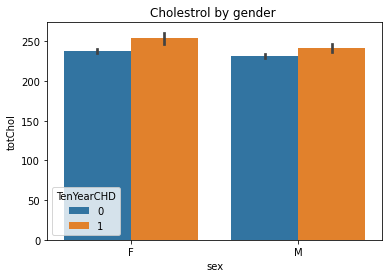

In [70]:

sns.barplot(data=cardio_df, y='totChol', x='sex', hue='TenYearCHD').set(title='Cholestrol by gender ')


##### 1. Why did you pick the specific chart?

bar chart is Showing the cholestrol level according to gender having the CHD or not .

##### 2. What is/are the insight(s) found from the chart?

Female has more cholesterol as compared to male. so, it it can cause your blood vessels to narrow and increase your risk of developing a blood clot.
More cholesterol increases CHD problem.


#### Chart - 14 - Correlation Heatmap

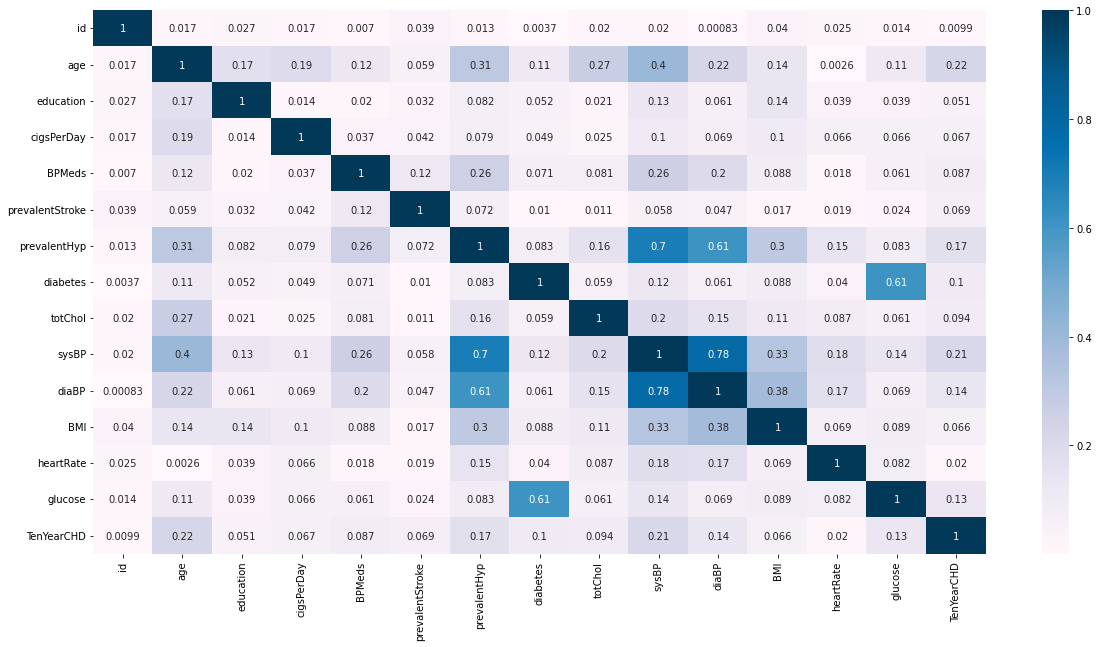

In [73]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,10))
sns.heatmap(cardio_df.corr().abs(),annot=True,cmap='PuBu')

##### 1. Why did you pick the specific chart?

Correlations are best represented using heat maps. Heat Maps is used to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most.

##### 2. What is/are the insight(s) found from the chart?

‘sysBP’ is moderately correlated with ‘prevalenthyp’, i.e. prevalent hypertension.
‘diaBP’ and ‘sysBP’ are somewhat moderately correlated.
‘glucose’ level are also moderately correlated to whether patient is diabetic.

#### Chart - 15 - Pair Plot 

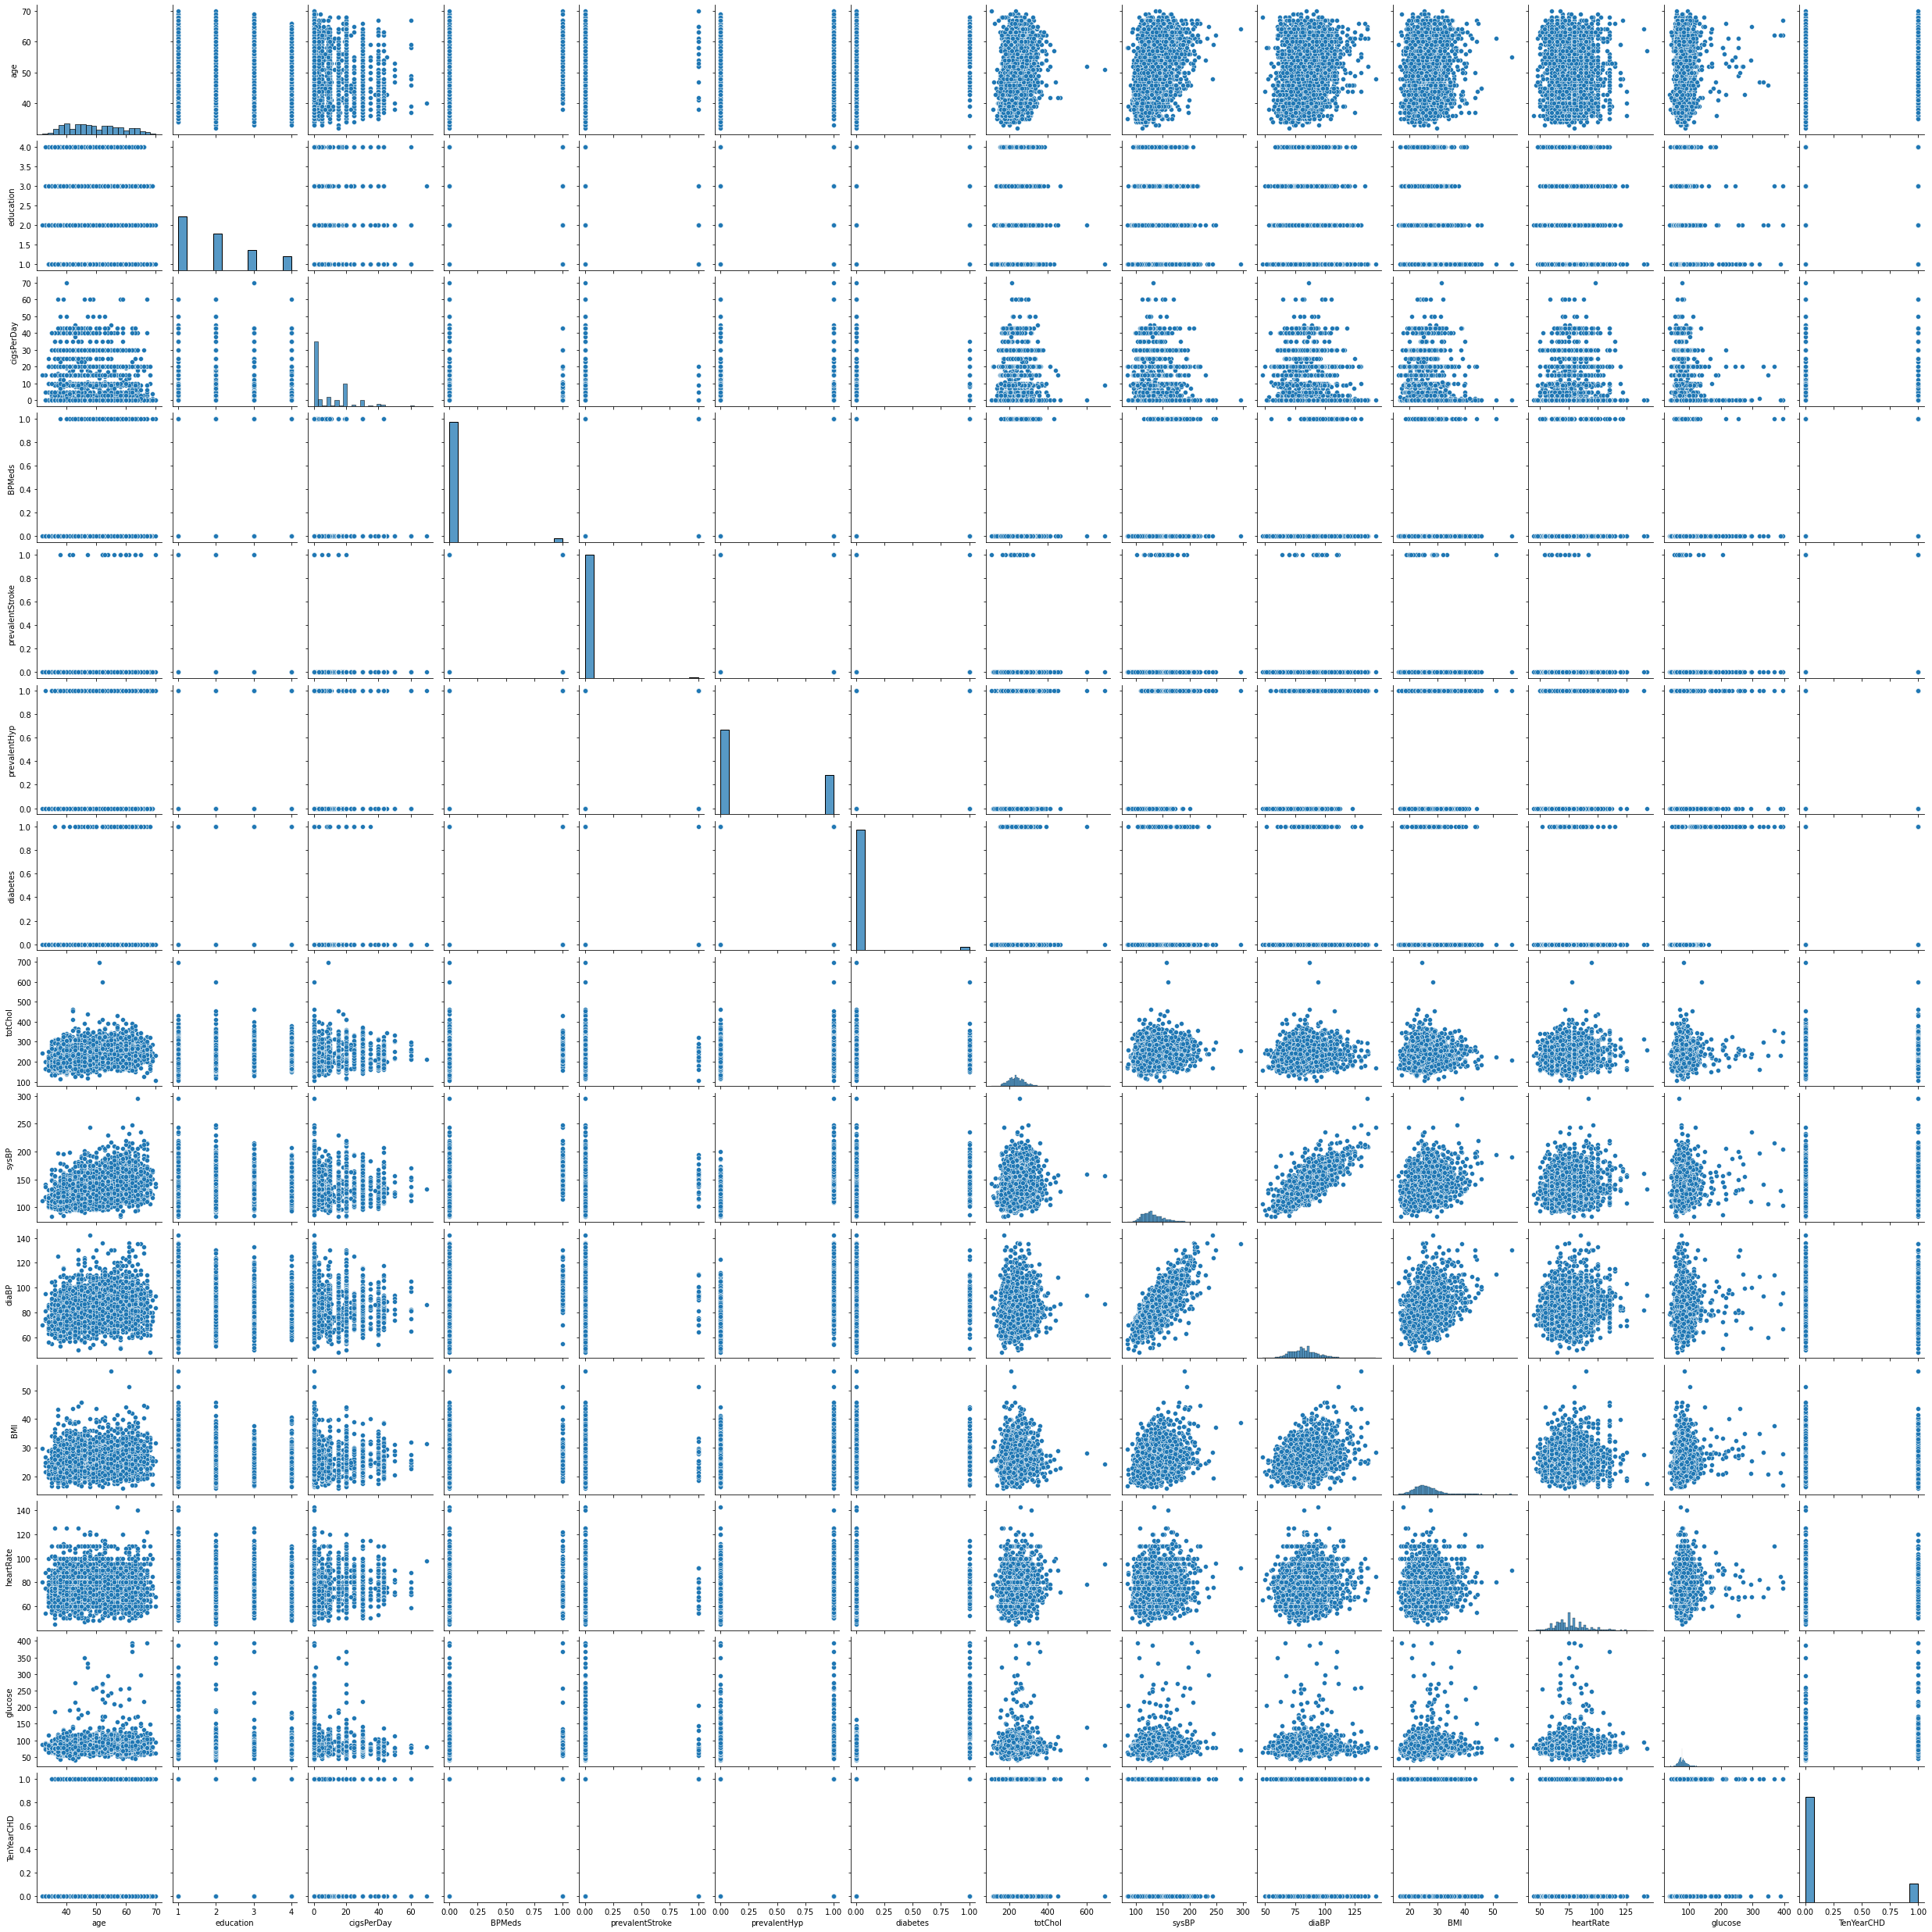

In [74]:
# Pair Plot visualization code
# Checking relation among all the columns once to do further analysis 
sns.pairplot(data=cardio_df.drop(('id'), axis=1))

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***